<a href="https://colab.research.google.com/github/rzr1331/bits/blob/master/ML_Assignment_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd


cars_df = pd.read_csv('/content/car_data.csv')
cars_df.shape

cars_df.columns = ['buying', 'maint', 'doors','persons','lug_boot','safety','evaluation']
cars_df


,buying,maint,doors,persons,lug_boot,safety,evaluation
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [ ]:
cars_df.describe()

,buying,maint,doors,persons,lug_boot,safety,evaluation
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,med,med,4,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [ ]:
#Lets find out the number of cars in each evaluation category
cars_df['evaluation'].value_counts().sort_index()

acc       384
good       69
unacc    1209
vgood      65
Name: evaluation, dtype: int64

In [ ]:
import plotly.graph_objects as go
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']

fig = go.Figure(data=[go.Pie(labels=['acc','good','unacc','vgood'],
                             values=[384,69,1209,65])])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()

In [ ]:
# Replacing some fixed string values to constant integer
cars_df.doors.replace(('5more'),('5'),inplace=True)
cars_df.persons.replace(('more'),('5'),inplace=True)

evaluation,acc,good,unacc,vgood
buying,,,,
high,108,0,324,0
low,89,46,258,39
med,115,23,268,26
vhigh,72,0,359,0
evaluation,acc,good,unacc,vgood
maint,,,,
high,105,0,314,13
low,92,46,268,26
med,115,23,268,26


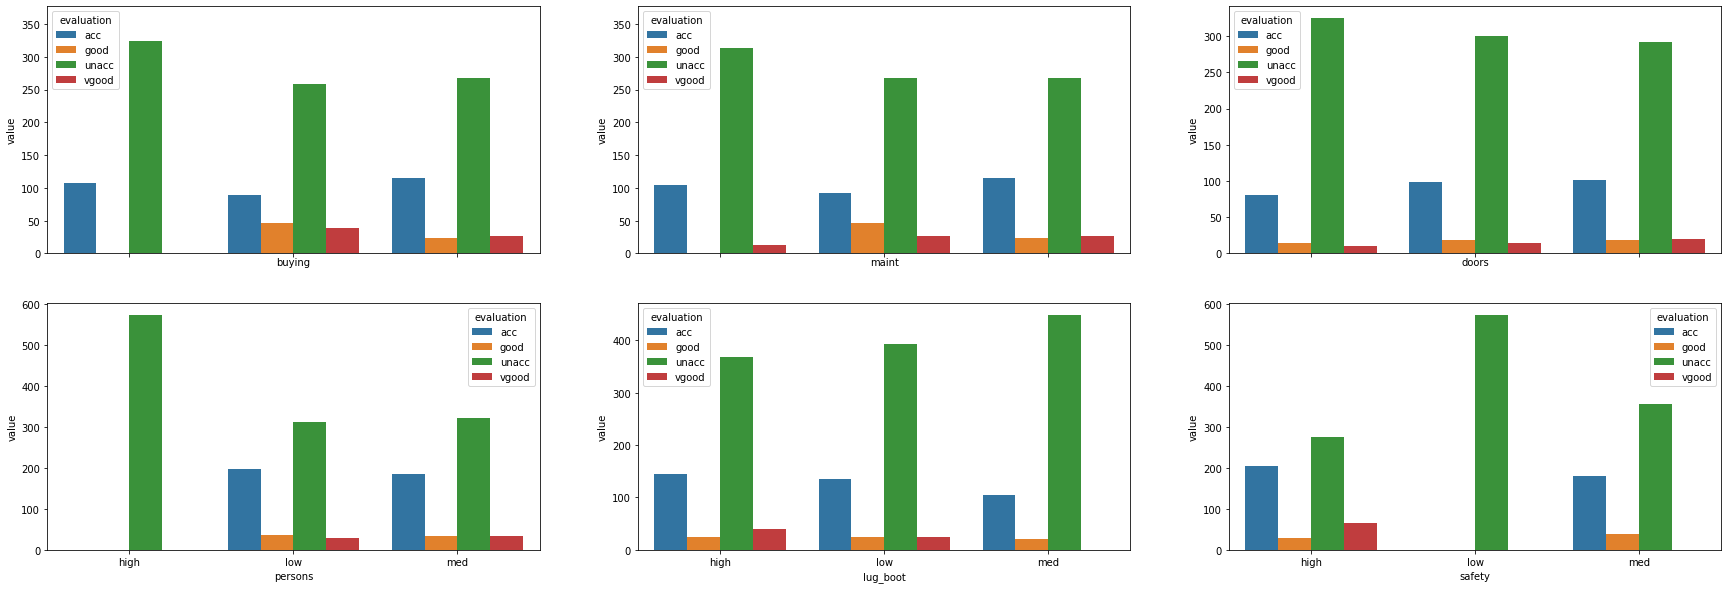

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display_html 

# Generating Crosstabs for each feature wrt result (evaluation)
buy = pd.crosstab(cars_df['buying'], cars_df['evaluation'])
mc = pd.crosstab(cars_df['maint'], cars_df['evaluation'])
drs = pd.crosstab(cars_df['doors'], cars_df['evaluation'])
prsn = pd.crosstab(cars_df['persons'], cars_df['evaluation'])
lb = pd.crosstab(cars_df['lug_boot'], cars_df['evaluation'])
sfty = pd.crosstab(cars_df['safety'], cars_df['evaluation'])

# Printing all crosstabs in one row
df1_styler = buy.style.set_table_attributes("style='display:inline'").set_caption('Buying')
df2_styler = mc.style.set_table_attributes("style='display:inline'").set_caption('Maintenance')
df3_styler = drs.style.set_table_attributes("style='display:inline'").set_caption('Doors')
df4_styler = prsn.style.set_table_attributes("style='display:inline'").set_caption('Persons')
df5_styler = lb.style.set_table_attributes("style='display:inline'").set_caption('Luggage Boot')
df6_styler = sfty.style.set_table_attributes("style='display:inline'").set_caption('Safety')
display_html(df1_styler._repr_html_()+df2_styler._repr_html_()+df3_styler._repr_html_()+df4_styler._repr_html_()+df5_styler._repr_html_()+df6_styler._repr_html_(), raw=True)

# Plotting Stacked Bar Plots for above crosstabs
stacked_buy = buy.stack().reset_index().rename(columns={0:'value'})
stacked_mc = mc.stack().reset_index().rename(columns={0:'value'})
stacked_drs = drs.stack().reset_index().rename(columns={0:'value'})
stacked_prsn = prsn.stack().reset_index().rename(columns={0:'value'})
stacked_lb = lb.stack().reset_index().rename(columns={0:'value'})
stacked_sfty = sfty.stack().reset_index().rename(columns={0:'value'})

# Creating a 2X3 Plot table
fig, axs = plt.subplots(2, 3, sharex=True, figsize=(30,10))

# Plot grouped bar chart
sns.barplot(x=stacked_buy.buying, y=stacked_buy.value, hue=stacked_buy.evaluation, ax=axs[0][0])
sns.barplot(x=stacked_mc.maint, y=stacked_mc.value, hue=stacked_mc.evaluation, ax=axs[0][1])
sns.barplot(x=stacked_drs.doors, y=stacked_drs.value, hue=stacked_drs.evaluation, ax=axs[0][2])
sns.barplot(x=stacked_prsn.persons, y=stacked_prsn.value, hue=stacked_prsn.evaluation, ax=axs[1][0])
sns.barplot(x=stacked_lb.lug_boot, y=stacked_lb.value, hue=stacked_lb.evaluation, ax=axs[1][1])
sns.barplot(x=stacked_sfty.safety, y=stacked_sfty.value, hue=stacked_sfty.evaluation, ax=axs[1][2])

In [ ]:
# Dividing dataset into X Y sets
x = cars_df.iloc[:, :-1]
y = cars_df.iloc[:, 6]
x.columns = ['buying', 'maint', 'doors','persons','lug_boot','safety']
y.columns=['evaluation']
x.head()

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,med
1,vhigh,vhigh,2,2,small,high
2,vhigh,vhigh,2,2,med,low
3,vhigh,vhigh,2,2,med,med
4,vhigh,vhigh,2,2,med,high


In [ ]:
# Splitting into categorical data
x = pd.get_dummies(x, prefix_sep='_', drop_first=True)
x.sample(5)

,buying_low,buying_med,buying_vhigh,maint_low,maint_med,maint_vhigh,doors_3,doors_4,doors_5,persons_4,persons_5,lug_boot_med,lug_boot_small,safety_low,safety_med
305,0,0,1,0,1,0,0,0,1,1,0,0,1,1,0
1674,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1
103,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0
1420,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
110,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0


Shape before dropping correlated columns :  (1727, 15)
Correlated Features :  {'persons_5'}


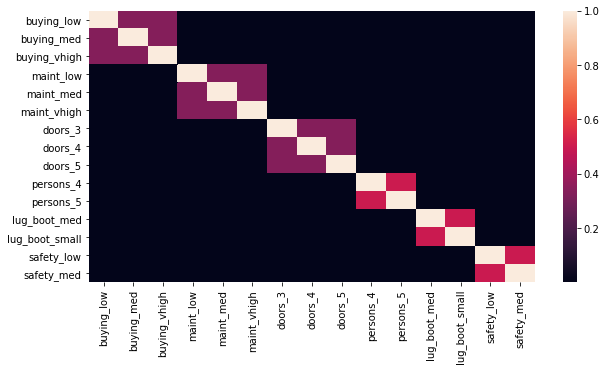

In [ ]:
# Correlation Analysis
correlation_matrix = x.corr().abs()
correlation_matrix
plt.subplots(figsize=(10,5))
sns.heatmap(correlation_matrix)
correlation_matrix
print("Shape before dropping correlated columns : " , x.shape)
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) >= 0.5:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
print("Correlated Features : ", correlated_features)
# As there are is no significant correlation b/w variables hence not dropping features.

# x_corr = x.copy()
# # Dropping highly correlated features : 
# for col in correlated_features:
#   del x_corr[col]

# x_corr

In [ ]:
# Data Prep
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Splitting into training & test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

# Scaling the given X training and test arrays using standard scaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
# evaluate a logistic regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

# Preparing for 10 Fold Cross Validation
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# Creating Model
model = LogisticRegression()
# Evaluate Model
scores = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# Report Performance
print('Cross Val Score Mean(Std): %.3f (%.3f)' % (mean(scores), std(scores)))

# Model Training & Results
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

f1_LR=f1_score(y_test,y_pred, average='macro')
cm = confusion_matrix(y_test, y_pred)
print("---------------------------------------------------------")
print("Confusion Matrix : \n", cm, "\n")
print("---------------------------------------------------------")
print("Classification Report : \n", classification_report(y_test,y_pred)) 
print("---------------------------------------------------------")
print("Training Accuracy: ", model.score(x_train, y_train))
print("Testing Accuracy: ", model.score(x_test, y_test))
print("---------------------------------------------------------")

Accuracy: 0.916 (0.029)
---------------------------------------------------------
Confusion Matrix : 
 [[ 69   2   6   0]
 [  2   7   0   5]
 [ 13   0 226   0]
 [  1   0   0  15]] 

---------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

         acc       0.81      0.90      0.85        77
        good       0.78      0.50      0.61        14
       unacc       0.97      0.95      0.96       239
       vgood       0.75      0.94      0.83        16

    accuracy                           0.92       346
   macro avg       0.83      0.82      0.81       346
weighted avg       0.92      0.92      0.92       346

---------------------------------------------------------
Training Accuracy:  0.9348298334540188
Testing Accuracy:  0.9161849710982659
---------------------------------------------------------


In [ ]:
# Predicting some random car data on the model given in question buying, maint, doors, persons, lug_boot, safety => vhigh,low,4,more,small,med :

data = [["vhigh", "low", 4, "more", "small", "med"]]
print("--------------------------------------------------------------------------------")
print("Given Question => Predict Evaluation for below mentioned inputs : \n", data)
print("--------------------------------------------------------------------------------")
print("Actual columns needed : \n", x.columns)
print("--------------------------------------------------------------------------------")
data = [[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1]]
question_test_df = pd.DataFrame(data, columns = x.columns)
# pd.set_option('display.max_columns', 50)
print("Data to be predicted : \n", question_test_df)
question_test_df = sc.transform(question_test_df)
question_test_prediction = model.predict(question_test_df)
print("================================================================================")
print("Prediction for the above mentioned data points would be : ", question_test_prediction[0])
print("================================================================================")


--------------------------------------------------------------------------------
Given Question => Predict Evaluation for below mentioned inputs : 
 [['vhigh', 'low', 4, 'more', 'small', 'med']]
--------------------------------------------------------------------------------
Actual columns needed : 
 Index(['buying_low', 'buying_med', 'buying_vhigh', 'maint_low', 'maint_med',
       'maint_vhigh', 'doors_3', 'doors_4', 'doors_5', 'persons_4',
       'persons_5', 'lug_boot_med', 'lug_boot_small', 'safety_low',
       'safety_med'],
      dtype='object')
--------------------------------------------------------------------------------
Data to be predicted : 
    buying_low  buying_med  buying_vhigh  ...  lug_boot_small  safety_low  safety_med
0           0           0             1  ...               1           0           1

[1 rows x 15 columns]
Prediction for the above mentioned data points would be :  unacc
